In [2]:
import re

import numpy as np
import pandas as pd

import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('../../../input/2016 School Explorer.csv')
df2 = pd.read_csv('../../../input/D5 SHSAT Registrations and Testers.csv')

In [4]:
df1_copy = df1.copy()
df2_copy = df2.copy()

In [5]:
for col in df1_copy.columns.values:
    print col

Adjusted Grade
New?
Other Location Code in LCGMS
School Name
SED Code
Location Code
District
Latitude
Longitude
Address (Full)
City
Zip
Grades
Grade Low
Grade High
Community School?
Economic Need Index
School Income Estimate
Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent
Rigorous Instruction %
Rigorous Instruction Rating
Collaborative Teachers %
Collaborative Teachers Rating
Supportive Environment %
Supportive Environment Rating
Effective School Leadership %
Effective School Leadership Rating
Strong Family-Community Ties %
Strong Family-Community Ties Rating
Trust %
Trust Rating
Student Achievement Rating
Average ELA Proficiency
Average Math Proficiency
Grade 3 ELA - All Students Tested
Grade 3 ELA 4s - All Students
Grade 3 ELA 4s - American Indian or Alaska Native
Grade 3 ELA 4s - Black or African American
Grade 3 ELA 4s - Hispanic or Latino
Grade 3 ELA 4s - Asian or Pacific

In [6]:
for col in df2_copy.columns.values:
    print col

DBN
School name
Year of SHST
Grade level
Enrollment on 10/31
Number of students who registered for the SHSAT
Number of students who took the SHSAT


In [7]:
remove = ['Other Location Code in LCGMS', 'Adjusted Grade', 'New?']
df1_copy = df1_copy.drop(columns=remove)

In [8]:
df1_copy['IsCommunitySchool'] = df1_copy['Community School?'] == 'Yes'
df1_copy = df1_copy.drop(columns=['Community School?'])

In [9]:
percent_pattern = r'Percent\s.*'
percent_regex = re.compile(percent_pattern, re.IGNORECASE)

for col in df1_copy.columns.values:
    if percent_regex.search(col):
        print col
        df1_copy[col] = df1_copy[col].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Student Attendance Rate'] = df1_copy['Student Attendance Rate'].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Percent of Students Chronically Absent'] = df1_copy['Percent of Students Chronically Absent'].astype(np.object).str.replace('%', '').astype(float)

Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Percent of Students Chronically Absent


In [10]:
df1_copy['School Name'] = df1_copy['School Name'].astype(str)
df1_copy = df1_copy[df1_copy['Grade High'] != '0K']
df1_copy['Grade High'] = df1_copy['Grade High'].astype(float)

<b> Remove the schools where highest grade taught is more than 5. This is because, SH-SAT is only for students studying in grade 8&9 

In [11]:
df1_copy = df1_copy[df1_copy['Grade High'] > 5]

<b> To derive a garding mechanism for school, we take all the paramters which specify the quality of schools.
We look at the correlation of the 6 factors based on which schools are rated. Weights for each of the factor was decided based on definitions and correlations.

In [12]:
school_rating = df1_copy[['Rigorous Instruction %',
'Collaborative Teachers %',
'Supportive Environment %',
'Effective School Leadership %',
'Strong Family-Community Ties %',
'Trust %']]

school_rating.head()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85%,78%,82%,73%,89%,88%
8,94%,91%,85%,87%,83%,93%
10,90%,81%,91%,67%,83%,85%
11,100%,100%,99%,99%,92%,99%
12,72%,77%,77%,72%,76%,87%


In [13]:
for col in school_rating.columns.values:
    school_rating[col] = school_rating[col].astype(np.object).str.replace('%', '').astype(float)
    
school_rating.head()

/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85.0,78.0,82.0,73.0,89.0,88.0
8,94.0,91.0,85.0,87.0,83.0,93.0
10,90.0,81.0,91.0,67.0,83.0,85.0
11,100.0,100.0,99.0,99.0,92.0,99.0
12,72.0,77.0,77.0,72.0,76.0,87.0


In [14]:
school_rating.dropna(inplace=True)
school_rating.corr()

/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Rigorous Instruction %,1.000000,0.757568,0.720514,0.643093,0.540730,0.708931
Collaborative Teachers %,0.757568,1.000000,0.594114,0.915435,0.485351,0.882959
Supportive Environment %,0.720514,0.594114,1.000000,0.488354,0.581007,0.714141
Effective School Leadership %,0.643093,0.915435,0.488354,1.000000,0.444356,0.853213
Strong Family-Community Ties %,0.540730,0.485351,0.581007,0.444356,1.000000,0.588877
Trust %,0.708931,0.882959,0.714141,0.853213,0.588877,1.000000


<b> Weights to each factor </b>

<br>1.0 Supportive Environment % (Supportive Environment Rating)
<br>0.8 Rigorous Instruction % (Rigorous Instruction Rating)
<br>0.7 Effective School Leadership % (Effective School Leadership Rating)
<br>0.5 Strong Family-Community Ties % (Strong Family-Community Ties Rating)

<br>Collaborative Teachers % (Collaborative Teachers Rating)
<br>Trust % (Trust Rating)

In [15]:
school_rating['SPI'] = 0.7 * school_rating['Effective School Leadership %'] + 0.8 * school_rating['Rigorous Instruction %'] + school_rating['Supportive Environment %']+ 0.5 * school_rating['Strong Family-Community Ties %']

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
school_rating['Location Code'] = df1_copy.loc[school_rating.index, 'Location Code']
school_rating['School Name'] = df1_copy.loc[school_rating.index, 'School Name']
school_rating['SED Code'] = df1_copy.loc[school_rating.index, 'SED Code']
school_rating['City'] = df1_copy.loc[school_rating.index, 'City']
school_rating['District'] = df1_copy.loc[school_rating.index, 'District']
school_rating['Latitude'] = df1_copy.loc[school_rating.index, 'Latitude']
school_rating['Longitude'] = df1_copy.loc[school_rating.index, 'Longitude']

/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/prathmesh/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [17]:
school_rating.columns.values

array(['Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %', 'SPI',
       'Location Code', 'School Name', 'SED Code', 'City', 'District',
       'Latitude', 'Longitude'], dtype=object)

In [18]:
school_rating[school_rating.columns.values].to_csv('SPI_data.csv')
school_rating.tail()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,SPI,Location Code,School Name,SED Code,City,District,Latitude,Longitude
1265,78.0,76.0,78.0,71.0,78.0,83.0,229.1,84X703,BRONX PREPARATORY CHARTER SCHOOL,320900860807,BRONX,9,40.839046,-73.900190
1266,84.0,88.0,84.0,85.0,87.0,91.0,254.2,84X704,KIPP ACADEMY CHARTER SCHOOL,320700860820,BRONX,7,40.816194,-73.926169
1268,93.0,90.0,88.0,88.0,88.0,93.0,268.0,84X706,HARRIET TUBMAN CHARTER SCHOOL,320900860823,BRONX,9,40.832272,-73.905817
1269,97.0,92.0,89.0,84.0,86.0,94.0,268.4,84X717,ICAHN CHARTER SCHOOL,320900860835,BRONX,9,40.839176,-73.904982
1271,87.0,84.0,84.0,77.0,85.0,84.0,250.0,84X730,BRONX CHARTER SCHOOL FOR THE ARTS,320800860846,BRONX,8,40.821798,-73.886463


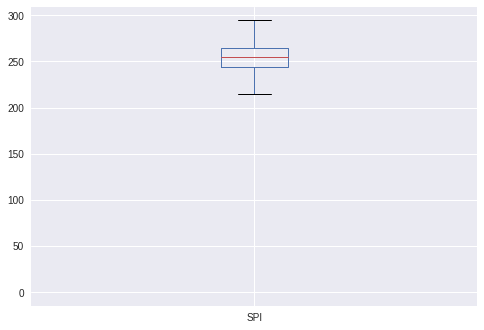

In [19]:
school_rating.boxplot(column='SPI')
plt.show()

In [20]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='prathmesh1', api_key='1AOnPuH5n8BB5ys2wxYB')

import cufflinks as cf
import pandas as pd
import numpy as np

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
school_rating[['Rigorous Instruction %',
'Collaborative Teachers %',
'Supportive Environment %',
'Effective School Leadership %',
'Strong Family-Community Ties %',
'Trust %',
'SPI']].iplot(kind='box', filename='box-plots_1')

In [21]:
poor_schools = school_rating[school_rating['SPI'] < school_rating['SPI'].quantile(0.25)]
print "Number of poor schools: " + str(len(poor_schools))

poor_schools_sorted = poor_schools.sort_values('SPI')

poor_schools_sorted.head()

Number of poor schools: 155


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,SPI,Location Code,School Name,SED Code,City,District,Latitude,Longitude
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84M202,GREAT OAKS CHARTER SCHOOL,310100861055,NEW YORK,1,40.719935,-73.991656
876,83.0,57.0,73.0,34.0,79.0,71.0,202.7,27Q045,P.S. 045 CLARENCE WITHERSPOON,342700010045,SOUTH OZONE PARK,27,40.672298,-73.788265
233,67.0,64.0,78.0,53.0,71.0,69.0,204.2,08X123,J.H.S. 123 JAMES M. KIERAN,320800010123,BRONX,8,40.824884,-73.873517
958,85.0,59.0,82.0,45.0,66.0,64.0,214.5,28Q680,QUEENS GATEWAY TO HEALTH SCIENCES SECONDARY SC...,342800011680,JAMAICA,28,40.718550,-73.805991
293,73.0,80.0,78.0,60.0,75.0,79.0,215.9,09X313,I.S. 313 SCHOOL OF LEADERSHIP DEVELOPMENT,320900010313,BRONX,9,40.840589,-73.904540


In [22]:
index_list = list(poor_schools.index)
print index_list
poor_schools_details_temp = df1_copy.loc[df1_copy.index.isin(index_list)]
poor_schools_details_temp.tail()
print poor_schools_details_temp.index

[12, 13, 19, 21, 63, 68, 71, 81, 100, 104, 123, 135, 147, 150, 151, 153, 165, 173, 178, 210, 213, 214, 218, 219, 233, 236, 242, 249, 251, 252, 253, 255, 259, 265, 273, 283, 284, 285, 286, 288, 293, 294, 296, 299, 300, 307, 315, 321, 327, 333, 334, 335, 339, 342, 344, 345, 360, 367, 398, 399, 423, 426, 429, 438, 440, 441, 442, 458, 470, 473, 480, 486, 527, 533, 535, 559, 564, 569, 578, 586, 593, 598, 608, 609, 630, 631, 637, 638, 644, 674, 676, 713, 718, 721, 757, 761, 762, 773, 774, 782, 786, 787, 789, 793, 816, 833, 839, 842, 853, 862, 875, 876, 891, 900, 904, 906, 912, 915, 922, 928, 946, 952, 954, 958, 959, 970, 979, 986, 988, 994, 1012, 1022, 1034, 1052, 1069, 1071, 1080, 1119, 1122, 1123, 1142, 1149, 1154, 1162, 1171, 1183, 1184, 1214, 1219, 1232, 1233, 1237, 1253, 1257, 1265]
Int64Index([  12,   13,   19,   21,   63,   68,   71,   81,  100,  104,
            ...
            1183, 1184, 1214, 1219, 1232, 1233, 1237, 1253, 1257, 1265],
           dtype='int64', length=155)


In [23]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 
for index in df1_copy.index:
    row = df1_copy.loc[index]   
#     school_name = "".join([i for i in row['School Name'] if ord(i) < 128]).replace("'", "")
    
    color = 'blue'
    
    if index in poor_schools_details_temp.index:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(school_map)
#     else:
#         folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color=color)).add_to(school_map)

school_map

In [25]:
poor_schools_details_temp.head()

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,IsCommunitySchool
12,ORCHARD COLLEGIATE ACADEMY,310100011292,01M292,1,40.713343,-73.986069,"220 HENRY ST NEW YORK, NY 10002",NEW YORK,10002,"06,07,08,09,10,11,12",...,0,0,0,0,0,0,0,0,0,True
13,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",310100010301,01M301,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003,"06,07,08",...,1,0,0,0,0,0,0,0,1,False
19,SCHOOL FOR GLOBAL LEADERS,310100010378,01M378,1,40.720185,-73.985957,"145 STANTON ST NEW YORK, NY 10002",NEW YORK,10002,"06,07,08",...,5,0,0,2,3,0,0,0,4,False
21,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05,06,07,08,09,10,11,12",...,0,0,0,0,0,0,0,0,0,False
63,THE 47 AMERICAN SIGN LANGUAGE & ENGLISH LOWER ...,310200010347,02M347,2,40.738621,-73.981534,"223 E 23RD ST NEW YORK, NY 10010",NEW YORK,10010,"PK,0K,01,02,03,04,05,06,07,08",...,0,0,0,0,0,0,0,0,0,False


In [26]:
from sklearn.cluster import KMeans

In [29]:
kmeans_ = KMeans(n_clusters=5)

In [30]:
kmeans_.fit(poor_schools_details_temp[['Latitude','Longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
kmeans_.cluster_centers_

array([[ 40.83441107, -73.9040675 ],
       [ 40.6797106 , -73.97612172],
       [ 40.68779476, -73.77899876],
       [ 40.6166798 , -74.10836   ],
       [ 40.67824047, -73.89626043]])

In [32]:
centroids = kmeans_.cluster_centers_

In [33]:
centroids.shape

(5, 2)

In [34]:
# from nltk.cluster.kmeans import KMeansClusterer
# NUM_CLUSTERS = <choose a value>
# data = <sparse matrix that you would normally give to scikit>.toarray()

# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
# assigned_clusters = kclusterer.cluster(data, assign_clusters=True)

# Visualizing the centroids

In [35]:


school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 


color = 'blue'
for centroid in centroids:
    folium.Marker([centroid[0],centroid[1]], icon=folium.Icon(color=color)).add_to(school_map)

school_map

In [36]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 
for index in df1_copy.index:
    row = df1_copy.loc[index]   
#     school_name = "".join([i for i in row['School Name'] if ord(i) < 128]).replace("'", "")
    
    color = 'blue'
    
    if index in poor_schools_details_temp.index:
        folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='red')).add_to(school_map)
#     else:
#         folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color=color)).add_to(school_map)

school_map

# Reading another dataset

In [37]:
df3 = pd.read_csv('../../../input/2010-2016-school-safety-report.csv')

In [62]:
df3_copy = df3.copy()
df3_copy.tail()

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
6305,2015-16,X972,08X519,Felisa Rincon de Gautier Institute for Law and...,X519,1440 STORY AVENUE,X,8.0,275,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6306,2015-16,X972,08X537,Bronx Arena High School,X537,1440 STORY AVENUE,X,8.0,215,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6307,2015-16,X972,NaN,1440 STORY AVENUE CONSOLIDATED LOCATION,NaN,1440 STORY AVENUE,X,8.0,490,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6308,2015-16,X973,12X271,East Bronx Academy for the Future,X271,1716 SOUTHERN BOULEVARD,X,12.0,665,NaN,...,BRONX,10460.0,40.836356,-73.888361,3.0,17.0,161.0,2010604.0,2.029830e+09,Crotona Park East ...
6309,2015-16,X991,79X695,Passages Academy,X695,560 BROOK AVENUE,X,7.0,254,NaN,...,BRONX,10455.0,40.815878,-73.914404,1.0,17.0,71.0,2000133.0,2.022760e+09,Melrose South-Mott Haven North ...


In [63]:
print df3_copy.columns.values

['School Year' 'Building Code' 'DBN' 'Location Name' 'Location Code'
 'Address' 'Borough' 'Geographical District Code' 'Register'
 'Building Name' '# Schools' 'Schools in Building' 'Major N' 'Oth N'
 'NoCrim N' 'Prop N' 'Vio N' 'ENGroupA' 'RangeA' 'AvgOfMajor N'
 'AvgOfOth N' 'AvgOfNoCrim N' 'AvgOfProp N' 'AvgOfVio N' 'Borough Name'
 'Postcode' 'Latitude' 'Longitude' 'Community Board' 'Council District '
 'Census Tract' 'BIN' 'BBL' 'NTA']


In [64]:
df3_copy = df3_copy[~np.isnan(df3_copy['Major N'])]

In [65]:
df3_copy.head()

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,"1,277",NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
4,2013-14,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,876,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
5,2013-14,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,513,NaN,...,BROOKLYN,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...
6,2013-14,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,312,NaN,...,BROOKLYN,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...
7,2013-14,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,714,NaN,...,BROOKLYN,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...


In [67]:
df3_copy = df3_copy[df3_copy['Major N'] > 2]

In [69]:
len(df3_copy)

178

In [73]:
df3_copy = df3_copy[~np.isnan(df3_copy['Latitude'])]
df3_copy = df3_copy[~np.isnan(df3_copy['Longitude'])]

df3_copy.head()
print len(df3_copy)

175


In [76]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 

for index in df3_copy.index:
    row = df3_copy.loc[index]      
    
    folium.Marker([row['Latitude'], row['Longitude']], icon=folium.Icon(color='green')).add_to(school_map)


school_map

In [145]:
df2_copy.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Took Percentage
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14,0.451613
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7,0.269231
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10,0.476190
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8,0.400000
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14,0.451613


In [146]:
df2_copy_sorted = df2_copy.groupby('School name').sum().reset_index().sort_values('Number of students who registered for the SHSAT',ascending=False)

In [147]:
df2_copy_sorted.head()

,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Took Percentage
15,KIPP Infinity Charter School,12087,50,494,296,65,1.267248
16,KIPP STAR College Prep Charter School,8058,32,292,292,96,1.310553
3,Columbia Secondary School,16116,68,794,253,179,5.397173
5,Democracy Prep Endurance Charter School,10076,42,567,194,94,3.998283
4,Democracy Prep Charter School,16116,68,943,145,100,3.776995


In [148]:
df2_copy_sorted['Took Percentage'] = df2_copy_sorted['Number of students who took the SHSAT'] / df2_copy_sorted['Number of students who registered for the SHSAT']

In [149]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))
sns.barplot(y='School name', x='Number of students who registered for the SHSAT', data=df2_copy_sorted, ax=ax[0], orient='h', ci=None)
sns.barplot(y='School name', x='Number of students who took the SHSAT', data=df2_copy_sorted, ax=ax[1], orient='h', ci=None)

# for ax in fig.axes[:-1]:
#     plt.sca(ax)
#     plt.xticks([])
plt.sca(fig.axes[-1])
plt.xticks(rotation=90)

fig.tight_layout()

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.barplot(y='School name', x='Took Percentage', data=df2_copy_sorted, ax=ax, orient='h', ci=None)
plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

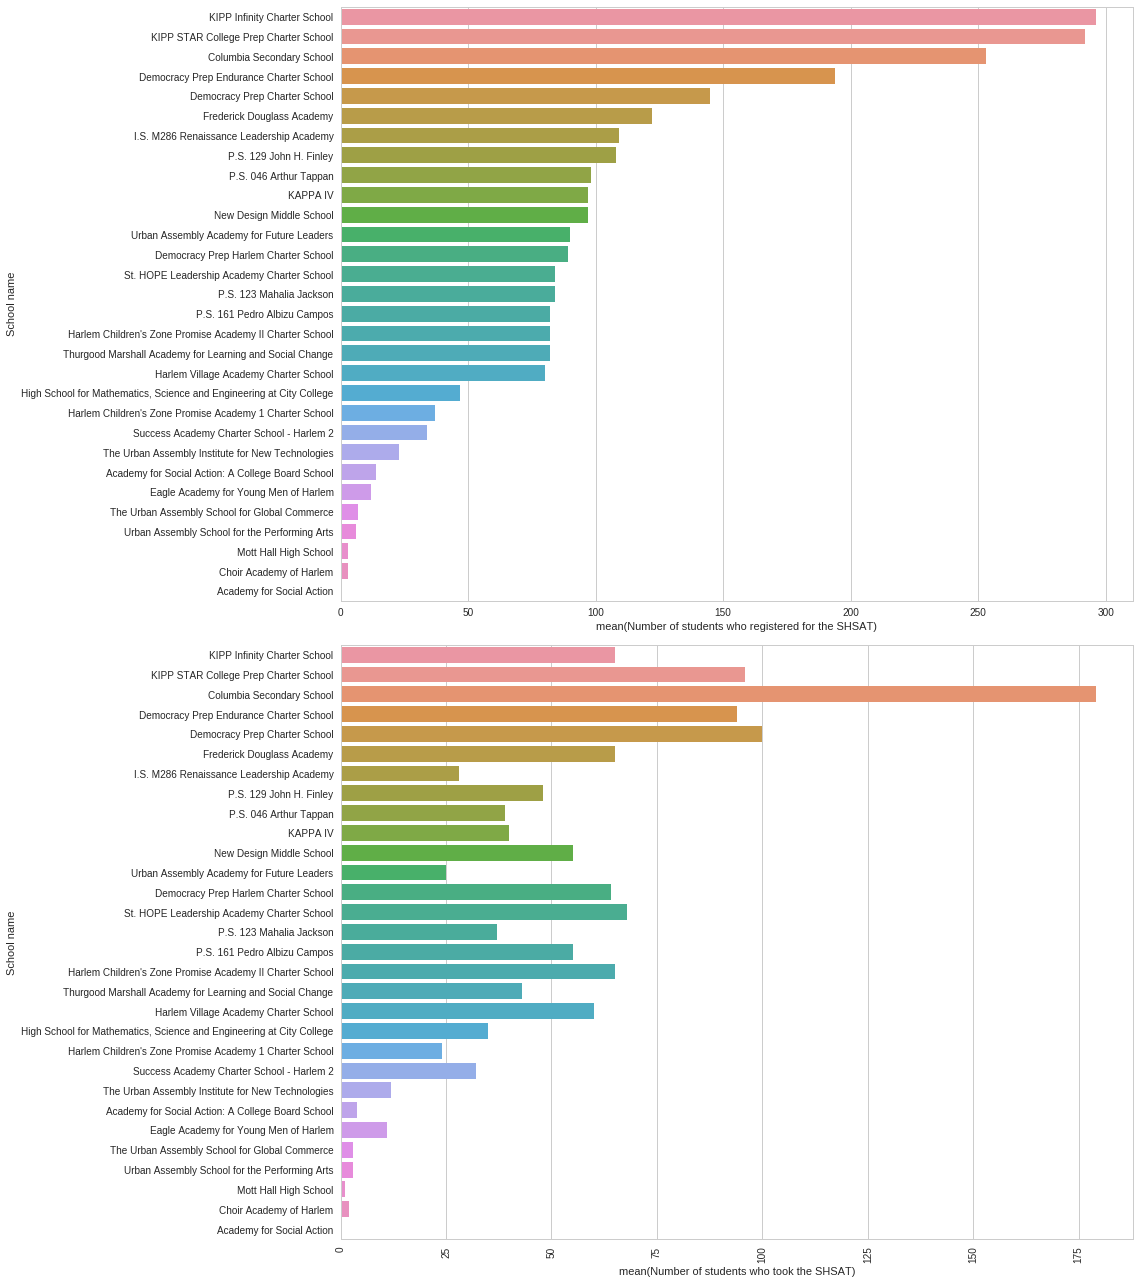

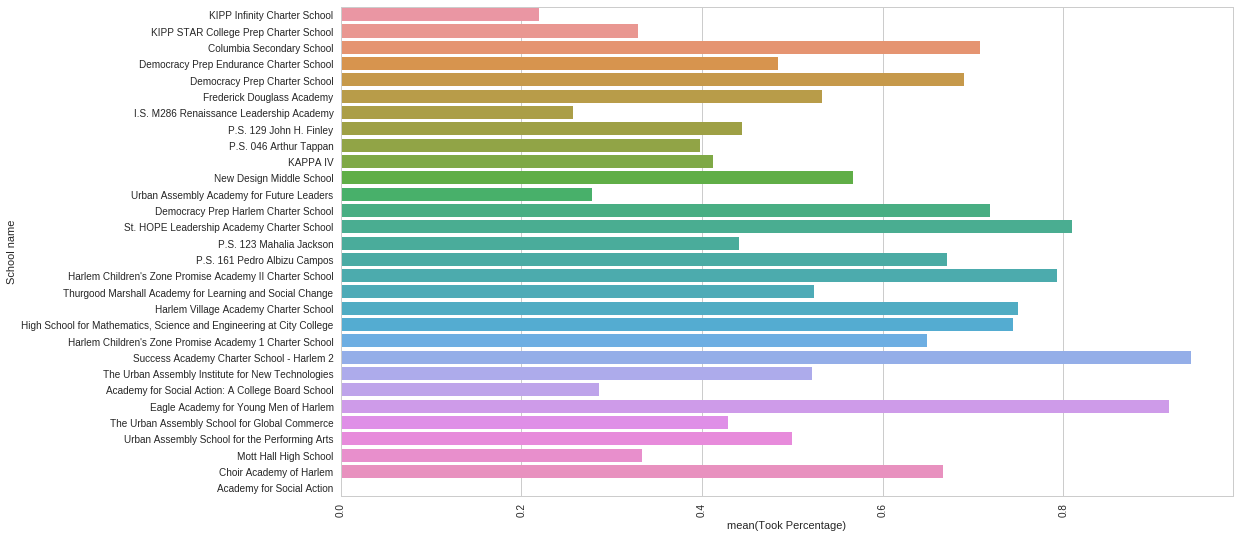

In [151]:
plt.show()

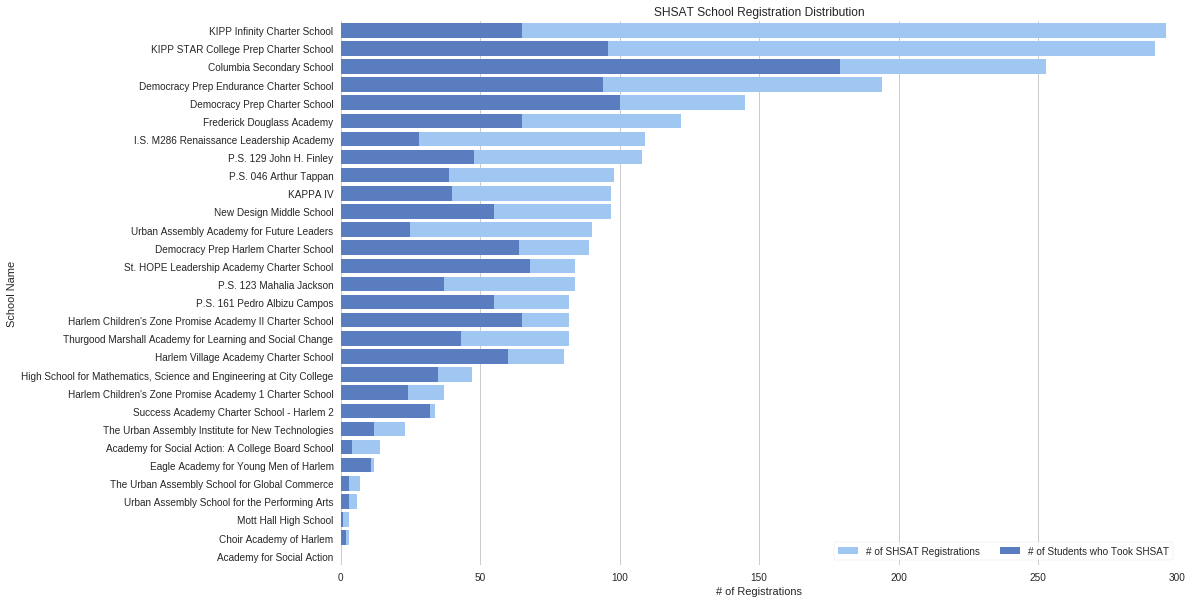

In [152]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y='School name', data=df2_copy_sorted,
            label="# of SHSAT Registrations", color="b", ci=None)

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=df2_copy_sorted,
            label="# of Students who Took SHSAT", color="b",ci=None)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="School Name", title='SHSAT School Registration Distribution',
       xlabel="# of Registrations")
sns.despine(left=True, bottom=True)
plt.show()

In [170]:
print len(df2_copy_sorted[df2_copy_sorted['Took Percentage'] <= 0.4])
df2_copy_sorted[df2_copy_sorted['Took Percentage'] <= 0.4].sort_values('Took Percentage')

7


,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Took Percentage
15,KIPP Infinity Charter School,12087,50,494,296,65,0.219595
13,I.S. M286 Renaissance Leadership Academy,6042,24,165,109,28,0.256881
28,Urban Assembly Academy for Future Leaders,2016,8,93,90,25,0.277778
1,Academy for Social Action: A College Board School,10069,43,254,14,4,0.285714
16,KIPP STAR College Prep Charter School,8058,32,292,292,96,0.328767
17,Mott Hall High School,8058,36,504,3,1,0.333333
19,P.S. 046 Arthur Tappan,8058,32,315,98,39,0.397959


In [174]:
poor_shsat_taken_school = list(np.unique(df2_copy_sorted['School name']))
total_schools = list(set(df1_copy['School Name']))

intersection = list(set(poor_shsat_taken_school).intersection(set(total_schools)))

print len(intersection)

1


In [173]:
df1_copy[df1_copy['School Name'] == 'KAPPA IV']['Percent Black / Hispanic']

147    92.0
Name: Percent Black / Hispanic, dtype: float64